In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
train_df = pd.read_csv("D:\\JupyterNotebooks\\data\\telco_train_dataset.csv")

In [43]:
train_df.shape

(5991, 20)

In [ ]:
train_df.info()

In [42]:
train_df['TotalCharges'] = pd.to_numeric(train_df['TotalCharges'])

In [41]:
train_df = train_df.drop(train_df[train_df['TotalCharges'] == ' '].index)

In [ ]:
train_df.head()

In [ ]:
train_df.drop('customerID', axis=1, inplace=True)

In [ ]:
train_df.isnull().sum()

In [46]:
train_obj_df = train_df.select_dtypes(include='object')

In [47]:
train_obj_df.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [48]:
train_num_df = train_df.select_dtypes(exclude='object')

c:\Users\Admin\miniconda3\envs\py_310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


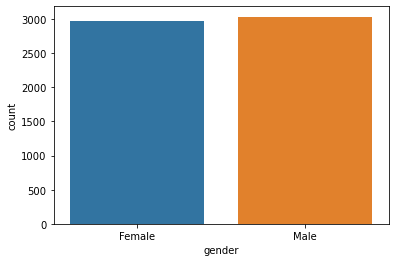

In [24]:
sns.countplot(train_obj_df['gender']);

In [25]:
from pandas_profiling import ProfileReport

In [49]:
profile = ProfileReport(train_obj_df)

In [52]:
train_obj_df.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [ ]:
profile

In [58]:
from sklearn.preprocessing import OneHotEncoder

In [59]:
ohe = OneHotEncoder()

In [60]:
train_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,Male,0,Yes,Yes,72,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),111.95,8033.10,No
5996,Male,0,No,No,62,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.85,1253.65,No
5997,Female,0,No,No,6,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.75,552.65,No
5998,Male,0,Yes,No,48,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.05,1036.00,No


In [ ]:
train_obj_df

In [71]:
cat_features = ohe.fit_transform(X_train)

In [86]:
final_df = pd.get_dummies(train_df, drop_first=True, columns = train_obj_df.columns)

In [87]:
final_df.shape

(5991, 31)

In [89]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [90]:
from sklearn.model_selection import train_test_split

In [97]:
final_df.rename(columns={'Churn_Yes': 'Churn'}, inplace=True)
final_df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [98]:
X = final_df.drop('Churn', axis=1)
y = final_df['Churn']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [100]:
ss = StandardScaler()
scaled_X_train = ss.fit_transform(X_train)
scaled_X_test = ss.transform(X_test)

In [102]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [103]:
rfc.fit(scaled_X_train, y_train)

RandomForestClassifier()

In [108]:
rfc_pred = rfc.predict(scaled_X_test)

In [109]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [110]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       876
           1       0.64      0.50      0.56       323

    accuracy                           0.79      1199
   macro avg       0.74      0.70      0.71      1199
weighted avg       0.78      0.79      0.78      1199



In [111]:
confusion_matrix(y_test, rfc_pred)

array([[786,  90],
       [162, 161]], dtype=int64)

In [112]:
roc_auc_score(y_test, rfc_pred)

0.6978561431782518

In [113]:
from sklearn.linear_model import LogisticRegression

In [114]:
lr = LogisticRegression()
lr.fit(scaled_X_train,y_train)

LogisticRegression()

In [115]:
lr_pred = lr.predict(scaled_X_test)

In [117]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.87       876
           1       0.68      0.55      0.61       323

    accuracy                           0.81      1199
   macro avg       0.77      0.73      0.74      1199
weighted avg       0.80      0.81      0.80      1199



In [118]:
confusion_matrix(y_test, lr_pred)

array([[794,  82],
       [145, 178]], dtype=int64)

In [119]:
roc_auc_score(y_test, lr_pred)

0.7287381426975983

In [122]:
from sklearn.model_selection import GridSearchCV

In [124]:
rfc = RandomForestClassifier()

In [128]:
param_grid = {
    'n_estimators': [1000,2000,500,3000],
    'max_depth': [3,5,7,9]
}

In [129]:
grid = GridSearchCV(rfc, param_grid)

In [130]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9],
                         'n_estimators': [1000, 2000, 500, 3000]})

In [133]:
grid_pred = grid.predict(scaled_X_test)

In [141]:
def my_model_metrics(y_true, y_pred):
    print("Classification Report: \n")
    print(classification_report(y_true, y_pred))
    
    print("ROC AUC Score: \n")
    print(roc_auc_score(y_true, y_pred))

    print("Confusion matrix: \n")
    plt.figure(figsize=(10,8))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d')

Classification Report: 

              precision    recall  f1-score   support

           0       0.84      0.92      0.87       876
           1       0.69      0.51      0.59       323

    accuracy                           0.81      1199
   macro avg       0.76      0.71      0.73      1199
weighted avg       0.80      0.81      0.80      1199

ROC AUC Score: 

0.7147285013500715
Confusion matrix: 



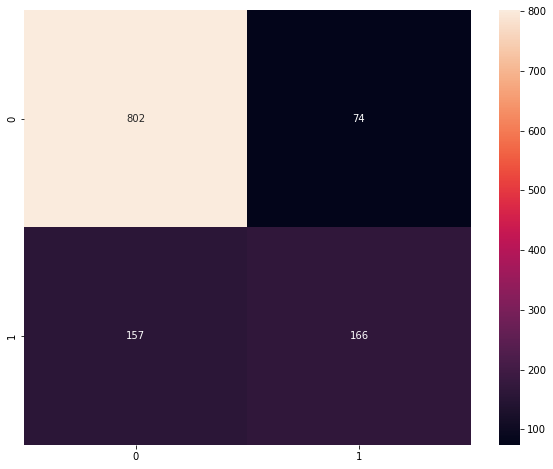

In [142]:
my_model_metrics(y_test, grid_pred)

In [143]:
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0,72,111.95,8033.10,1,1,1,1,0,0,...,0,1,0,1,0,1,0,0,0,0
5996,0,62,19.85,1253.65,1,0,0,1,0,0,...,1,0,1,0,0,1,0,0,0,0
5997,0,6,89.75,552.65,0,0,0,1,0,1,...,0,1,0,0,0,0,1,0,1,0
5998,0,48,20.05,1036.00,1,1,0,1,0,0,...,1,0,1,0,0,1,1,0,0,1


Running on whole test dataset

In [145]:
test_df = pd.read_csv("D:\\JupyterNotebooks\\data\\telco_test_dataset.csv")

In [147]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043 entries, 0 to 1042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1043 non-null   object 
 1   gender            1043 non-null   object 
 2   SeniorCitizen     1043 non-null   int64  
 3   Partner           1043 non-null   object 
 4   Dependents        1043 non-null   object 
 5   tenure            1043 non-null   int64  
 6   PhoneService      1043 non-null   object 
 7   MultipleLines     1043 non-null   object 
 8   InternetService   1043 non-null   object 
 9   OnlineSecurity    1043 non-null   object 
 10  OnlineBackup      1043 non-null   object 
 11  DeviceProtection  1043 non-null   object 
 12  TechSupport       1043 non-null   object 
 13  StreamingTV       1043 non-null   object 
 14  StreamingMovies   1043 non-null   object 
 15  Contract          1043 non-null   object 
 16  PaperlessBilling  1043 non-null   object 


In [152]:
test_df = test_df.drop(test_df[test_df['TotalCharges'] == ' '].index, axis=0)

In [154]:
test_df['TotalCharges'] = pd.to_numeric(test_df['TotalCharges'])

In [159]:
test_df.drop('customerID', axis=1, inplace=True)

In [163]:
test_df_cat_cols = test_df.select_dtypes(include='object').columns

In [164]:
final_test_df = pd.get_dummies(test_df, drop_first=True, columns=test_df_cat_cols)

In [168]:
final_test_df.shape, train_df.shape

((1041, 31), (5991, 20))

In [169]:
final_test_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,52,19.65,928.40,1,0,1,1,0,0,...,0,1,0,1,0,0,1,0,0,0
1,0,1,24.90,24.90,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,0,6,82.85,460.25,1,1,0,1,0,1,...,1,0,0,0,0,1,0,1,0,1
3,0,71,93.20,6506.15,0,1,0,1,0,1,...,1,0,1,0,1,0,1,0,0,0
4,0,67,84.80,5598.30,0,1,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038,0,24,84.80,1990.50,1,1,1,1,0,1,...,1,0,1,1,0,1,0,0,1,0
1039,0,72,103.20,7362.90,0,1,1,1,0,1,...,1,0,1,1,0,1,1,0,0,0
1040,0,11,29.60,346.45,0,1,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1041,1,4,74.40,306.60,1,1,0,1,0,1,...,0,0,0,0,0,1,0,0,1,1


In [174]:
X_train = X
y_train = y

X_test = final_test_df.drop('Churn_Yes', axis=1)
y_test = final_test_df['Churn_Yes']

In [178]:
scaled_X_train = ss.fit_transform(X_train)
scaled_X_test  =ss.transform(X_test)

In [180]:
lr = LogisticRegression()
lr.fit(scaled_X_train, y_train) 

LogisticRegression()

In [181]:
full_lr_pred = lr.predict(scaled_X_test)

In [ ]:
my_model_metrics(y_test, full_lr_pred)

In [186]:
rfc = RandomForestClassifier(n_estimators=1000, max_depth=7, criterion='gini')

In [187]:
rfc.fit(scaled_X_train, y_train)
rfc_full_pred = rfc.predict(scaled_X_test)

In [ ]:
my_model_metrics(y_test, rfc_full_pred)

In [189]:
y_train.value_counts()

0    4405
1    1586
Name: Churn, dtype: int64

In [191]:
from imblearn.over_sampling import SMOTE

In [195]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [204]:
X_resampled = ss.fit_transform(X_resampled)

Re-fitting models on balanced classes

In [205]:
rfc = RandomForestClassifier(n_estimators=1000, max_depth=7, criterion='gini')

In [206]:
rfc.fit(X_resampled, y_resampled)
rfc_pred = rfc.predict(scaled_X_test)

Classification Report: 

              precision    recall  f1-score   support

           0       0.88      0.79      0.83       758
           1       0.56      0.71      0.63       283

    accuracy                           0.77      1041
   macro avg       0.72      0.75      0.73      1041
weighted avg       0.79      0.77      0.78      1041

ROC AUC Score: 

0.750689931659472
Confusion matrix: 



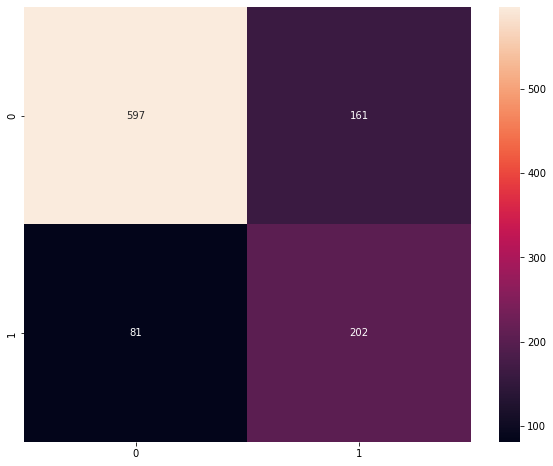

In [207]:
my_model_metrics(y_test, rfc_pred)

Classification Report: 

              precision    recall  f1-score   support

           0       0.93      0.58      0.72       758
           1       0.44      0.88      0.59       283

    accuracy                           0.66      1041
   macro avg       0.69      0.73      0.65      1041
weighted avg       0.80      0.66      0.68      1041

ROC AUC Score: 

0.7325932106995348
Confusion matrix: 



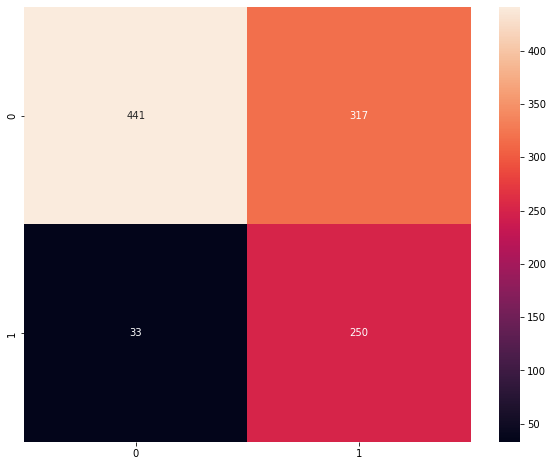

In [209]:
lr = LogisticRegression()
lr.fit(X_resampled, y_resampled)
lr_pred = lr.predict(scaled_X_test)
my_model_metrics(y_test, lr_pred)

In [210]:
from sklearn.neighbors import KNeighborsClassifier

Classification Report: 

              precision    recall  f1-score   support

           0       0.87      0.72      0.79       758
           1       0.49      0.71      0.58       283

    accuracy                           0.72      1041
   macro avg       0.68      0.72      0.69      1041
weighted avg       0.77      0.72      0.73      1041

ROC AUC Score: 

0.7172608780778877
Confusion matrix: 



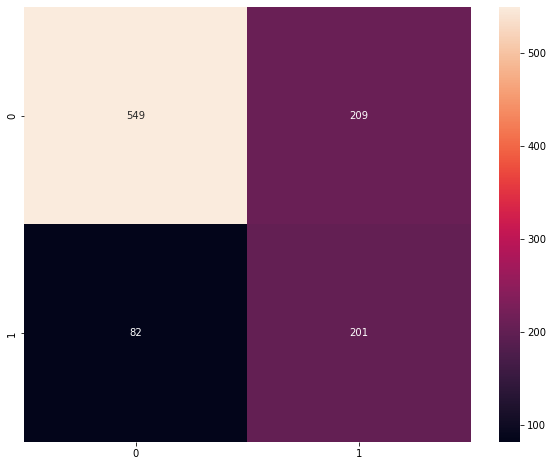

In [211]:
knn = KNeighborsClassifier()
knn.fit(X_resampled, y_resampled)
knn_pred = knn.predict(scaled_X_test)
my_model_metrics(y_test, knn_pred)

In [215]:
knn = KNeighborsClassifier()

In [216]:
param_grid = {
    'n_neighbors': [3,5,11,19,17],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

Classification Report: 

              precision    recall  f1-score   support

           0       0.90      0.67      0.77       758
           1       0.48      0.80      0.60       283

    accuracy                           0.71      1041
   macro avg       0.69      0.74      0.69      1041
weighted avg       0.79      0.71      0.72      1041

ROC AUC Score: 

0.738131310776919
Confusion matrix: 



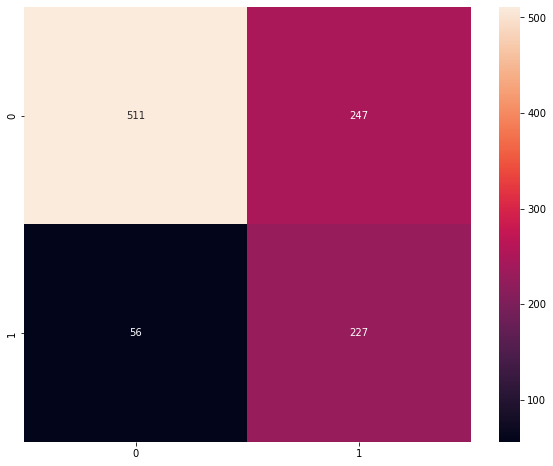

In [218]:
grid = GridSearchCV(knn, param_grid)
grid.fit(X_resampled, y_resampled)
grid_pred = grid.predict(scaled_X_test)
my_model_metrics(y_test, grid_pred)